# Import packages, business as usual

In [1]:
#Import packages
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Start a so called "Toy Weather Data", i.e. create an ad hoc xarray dataset to be used as data

This example was adapted from: 
https://docs.xarray.dev/en/stable/examples/weather-data.html

In [2]:
#define a seed for random generation
np.random.seed(123)

#make it easier to display
xr.set_options(display_style="html")                                                   

#define tthe timevector of our dataset, by defining a range and a label ("time")
times = pd.date_range("2000-01-01", "2003-12-31", name="time")

#Define a common cycle
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))

#rehsape it
base = 10 + 15 * annual_cycle.reshape(-1, 1) #make it dimension one (1), and unconstrain the other dimension (-1)

#Use the annual cycle to build tmin and tmax, by adding some random offset to the basevalue
tmin_values = base + 2 * 0.25*np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * 0.5*np.random.randn(annual_cycle.size, 3)


# With the information defined above, create an x-array dataset

In [3]:

ds = xr.Dataset(
    {
        "tmin": (("time", "location"), tmin_values), 
        "tmax": (("time", "location"), tmax_values),
    },
    {"time": times, "location": ["Nic", "Lar", "Paph"]},
)

ds

<xarray.Dataset>
Dimensions:   (time: 1461, location: 3)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2003-12-31
  * location  (location) <U4 'Nic' 'Lar' 'Paph'
Data variables:
    tmin      (time, location) float64 -5.323 -4.282 -4.639 ... -4.558 -5.351
    tmax      (time, location) float64 5.899 4.252 4.483 ... 3.887 3.216 3.417

### Note how dimensions are prescribed along with actual numerical values, when creating the dataset. 

# Let's get started:
### Select tmax and plot the values, cycling over the dimension "location"

Text(0.5, 1.0, 'Timeseries for all locations')

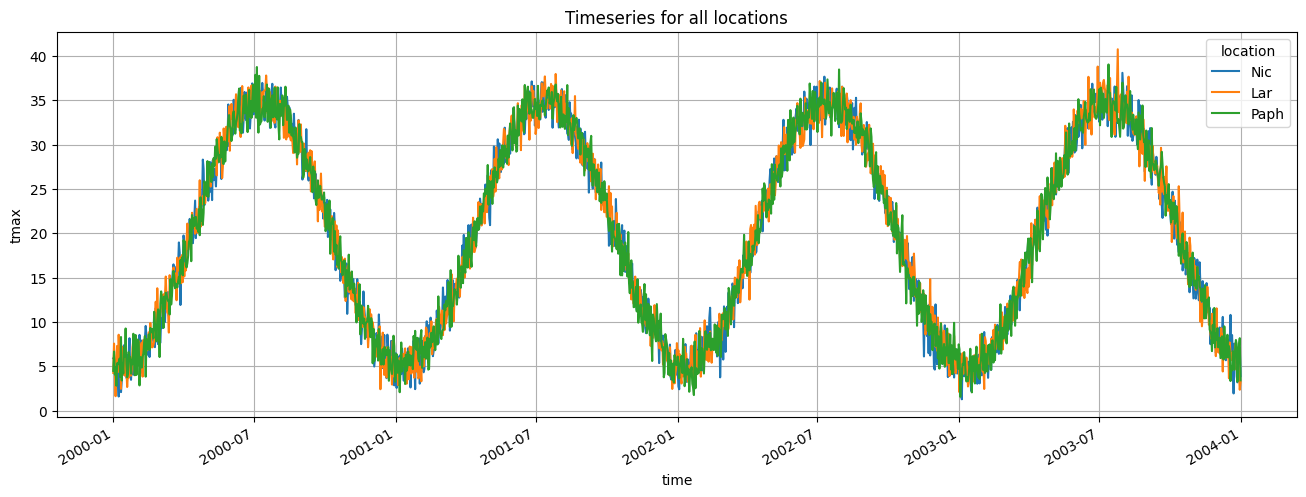

In [14]:
ds['tmax'].plot(figsize=(16, 5), hue='location')
plt.grid()
plt.title("Timeseries for all locations")

### Compute the mean over space (i.e., the locations), and plot both tmax and tmin:

Text(0.5, 1.0, 'Average for max and min tempertures -- whole timeseries')

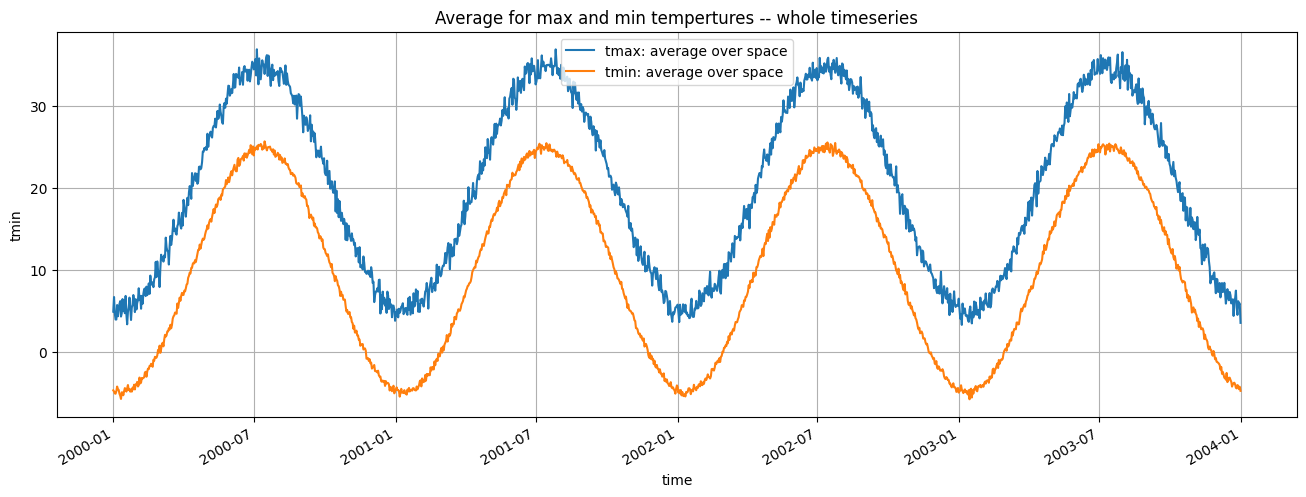

In [15]:
fig, ax = plt.subplots(figsize=(16,5))
for var in ['tmax', 'tmin']:
    ds[var].mean(dim="location").plot(label='{}: average over space'.format(var),ax=ax)


plt.legend()
plt.grid(True)
ax.set_title("Average for max and min tempertures -- whole timeseries")


# Compute daily mean and filter out the noise
Daily mean, averages all available data into 365 bins, and extracts average. 

Text(0.5, 1.0, 'Daily means for 3 different stations -- filtered with rolling average, window: 7 days')

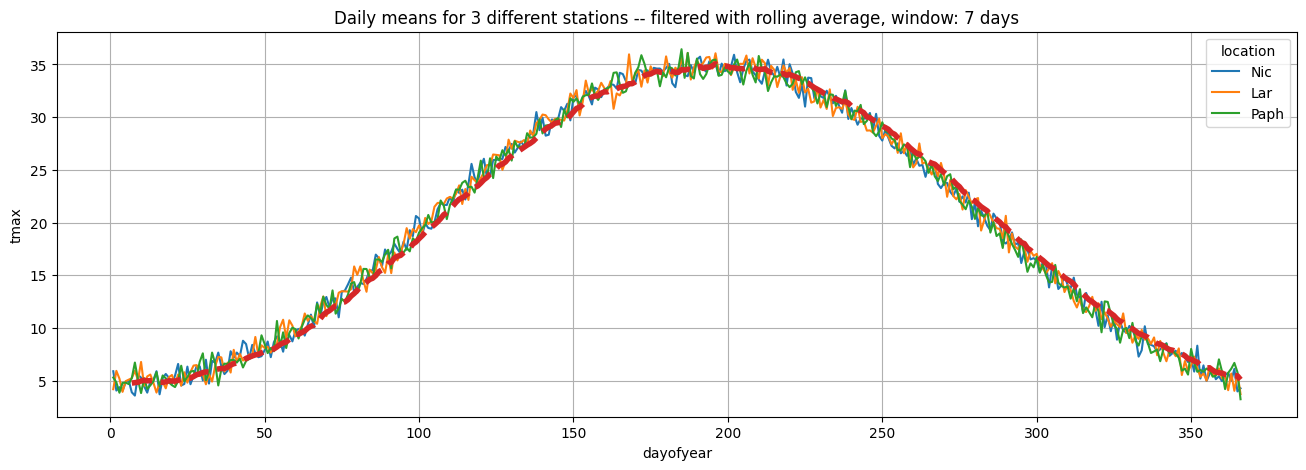

In [79]:
fig, ax = plt.subplots(figsize=(16,5))
ds['tmax'].groupby("time.dayofyear").mean("time").plot(hue='location', ax=ax, label = 'max')
win = 7
ds['tmax'].mean(dim='location').groupby("time.dayofyear").mean("time").rolling(dayofyear=win).mean().plot(ls='--',lw=4)
plt.grid()
ax.set_title('Daily means for 3 different stations -- filtered with rolling average, window: {} days'.format(win))


# Calculate monthly anomalies (not monthly means!)

A monthly climatology, for example, will produce a mean value for each month and a daily climatology will produce a mean value for each day, over a specified time range. Anomalies, or the deviation from the mean, are created by subtracting climatological values from observed data.

source: https://iridl.ldeo.columbia.edu/dochelp/StatTutorial/Climatologies/index.html

# Calculate monthly anomalies (not monthly means!)

A monthly climatology, for example, will produce a mean value for each month and a daily climatology will produce a mean value for each day, over a specified time range. Anomalies, or the deviation from the mean, are created by subtracting climatological values from observed data.

source: https://iridl.ldeo.columbia.edu/dochelp/StatTutorial/Climatologies/index.html

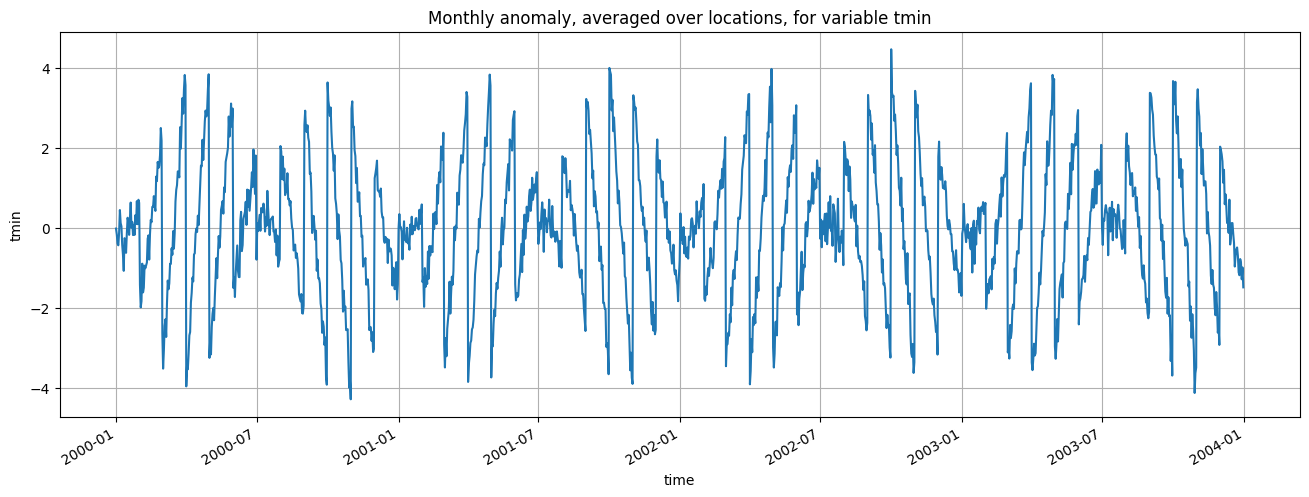

In [12]:
variable = 'tmin'
climatology = ds.groupby("time.month").mean("time")
anomalies = ds.groupby("time.month") - climatology
anomalies[variable].mean("location").plot(figsize=(16,5))
plt.title("Monthly anomaly, averaged over locations, for variable {}".format(variable))
plt.grid()